Clustering hashtags and profiles

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('coolwarm')
%matplotlib inline

In [19]:
profile_df = pd.read_csv('Business Analytics/tagged_profiles.csv')

In [21]:
profile_df.drop(columns=['std_eng','tot_eng','max_eng','min_eng'],inplace=True)

In [22]:
profile_df.isna().sum()

avg_eng       0
n_posts       0
profile       0
followers    22
dtype: int64

In [26]:
profile_df[profile_df['followers'].isna()]

,avg_eng,n_posts,profile,followers
254,557778.149079,597,@t,NaN
325,640673.500000,4,@malcolmbrogdon,NaN
356,632593.909091,11,@sdinwiddie_2508,NaN
383,641382.500000,4,@nvonleh,NaN
406,620243.000000,2,@keefmorris5,NaN
449,732310.666667,3,@jonasjerebko8,NaN
468,710571.000000,1,@_dameology,NaN
518,593913.714286,56,@kevindurant,NaN
587,411664.000000,1,@trey_duval,NaN
588,451514.000000,2,@utahjazzsl,NaN


In [27]:
profile_df.dropna(inplace=True)

In [28]:
profile_df[profile_df['followers'].isna()]

,avg_eng,n_posts,profile,followers


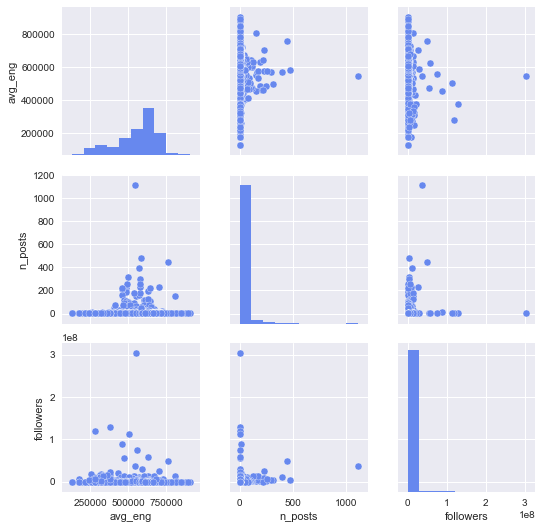

In [31]:
sns.pairplot(profile_df)

Now log transform n posts and followers, and normalize both datasets. 

In [32]:
profile_df['followers'] = np.log10(profile_df['followers']+1)
profile_df['n_posts'] = np.log10(profile_df['n_posts'])

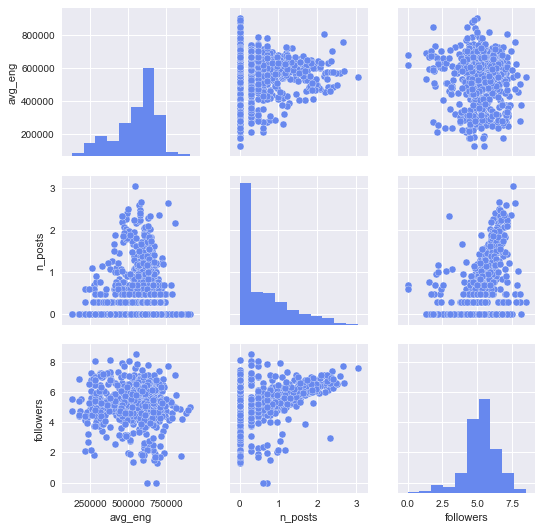

In [33]:
sns.pairplot(profile_df)

We now see a correlation between # of times a player is posted about on the nba insta, and how many followers he has. That's huge

In [34]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

x = profile_df.drop('profile',axis=1).values #returns a numpy array #removes missing followers (broken accounts)

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)


In [37]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df)
    distortions.append(kmeanModel.inertia_)

plt.plot(K,distortions,'o-')

In [39]:
kmeanModel = KMeans(n_clusters=3).fit(df)

In [40]:
profile_df.dropna(subset=['followers'],inplace=True)
profile_df['Cluster'] = kmeanModel.labels_

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


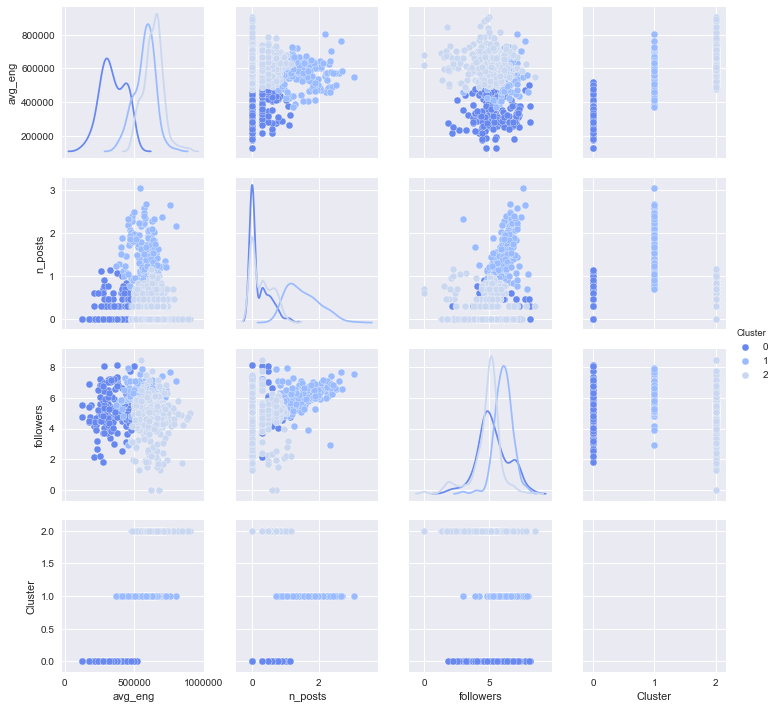

In [42]:
sns.pairplot(profile_df,hue='Cluster',diag_kind='kde')

In [55]:
profiles = profile_df[['profile','Cluster']].copy()
profiles = pd.get_dummies(profiles,columns=['Cluster'])

In [58]:
def apply_profile_clusters_to_training(z,profiles):
    """Apply the clusters to the dataset, now in a form for prediction aligned with the other data. 
   
   """
    
    import re
    from numpy import zeros
    post_clusters = zeros(profiles.shape[1] - 1)
    tags_in_z =  list( dict.fromkeys(re.findall('@[a-z_0-9]*',z)) ) 
    
    if len(tags_in_z) == 0:
        return post_clusters
    for tag_in_z in tags_in_z:
        try:
            post_clusters = post_clusters + profiles[profiles['profile'] == tag_in_z].values[0][1:] 
        except: 
            pass
    return post_clusters

In [59]:
instas = pd.read_csv('Business Analytics/training_set.csv',encoding = 'unicode_escape')

instas.dropna(inplace=True)

instas['Clusters'] = instas['Description'].str.lower().apply(lambda z: apply_clusters_to_training(z,profiles))
clusters = pd.DataFrame(instas.Clusters.tolist(), columns=['profiles_nC1', 'profiles_nC2','profiles_nC3'])

In [61]:
instas = instas.merge(clusters,left_index=True,right_index=True).drop('Clusters',axis=1)

Now do the same for hashtags

In [67]:
hashtag_df = pd.read_csv('Business Analytics/used_hashtags.csv')

In [69]:
hashtag_df.drop(columns=['max_eng','min_eng'],inplace=True)

In [72]:
hashtag_df.describe()

,avg_eng,n_posts,# of posts
count,349.000000,349.000000,3.490000e+02
mean,548651.251942,19.945559,3.690869e+06
std,156909.969454,122.299730,3.438073e+07
min,159402.000000,1.000000,0.000000e+00
25%,427726.727273,1.000000,6.620000e+02
50%,569414.000000,2.000000,6.999000e+03
75%,668808.000000,8.000000,1.128640e+05
max,952816.000000,2118.000000,4.893160e+08


In [70]:
hashtag_df.isna().sum()

avg_eng       0
hashtags      0
n_posts       0
# of posts    0
dtype: int64

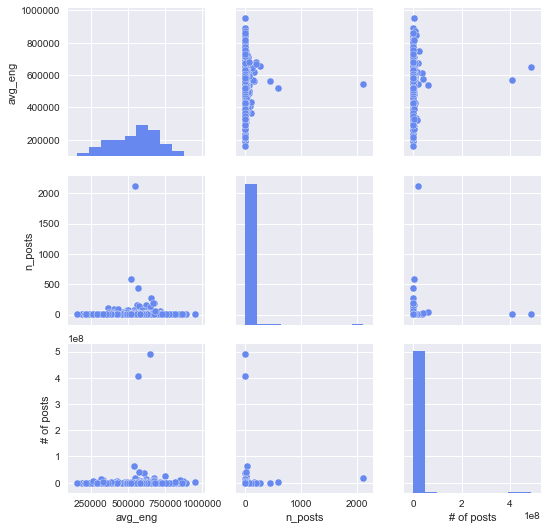

In [71]:
sns.pairplot(hashtag_df)

In [73]:
hashtag_df['# of posts'] = np.log10(hashtag_df['# of posts'] + 1)
hashtag_df['n_posts'] = np.log10(hashtag_df['n_posts'])

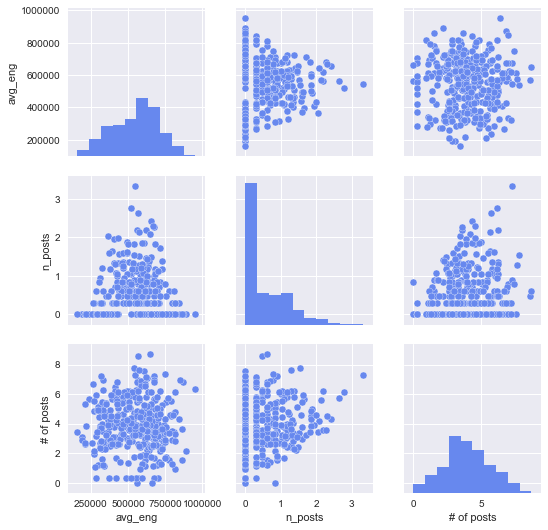

In [74]:
sns.pairplot(hashtag_df)

In [75]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

x = hashtag_df.drop('hashtags',axis=1).values #returns a numpy array #removes missing followers (broken accounts)

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)


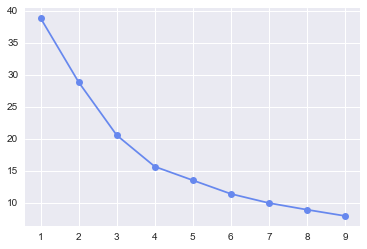

In [76]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df)
    distortions.append(kmeanModel.inertia_)

plt.plot(K,distortions,'o-')

In [77]:
kmeanModel = KMeans(n_clusters=4).fit(df)

In [79]:
hashtag_df['Cluster'] = kmeanModel.labels_

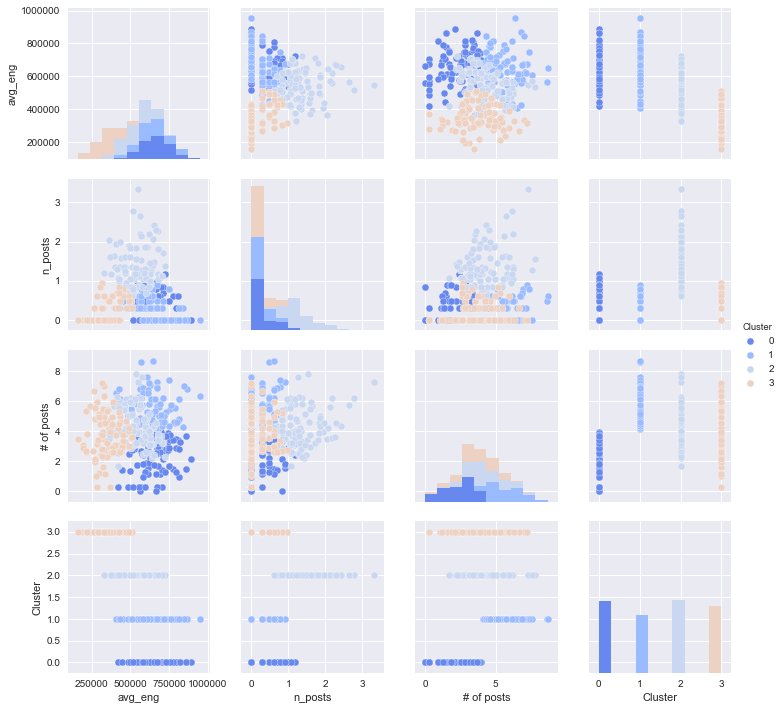

In [80]:
sns.pairplot(hashtag_df,hue='Cluster')

In [81]:
hashtags = hashtag_df[['hashtags','Cluster']].copy()
hashtags = pd.get_dummies(hashtags,columns=['Cluster'])

In [98]:
def apply_hashtag_clusters_to_training(z,hashtags):
    """Apply the clusters to the dataset, now in a form for prediction aligned with the other data. 
   
   """
    
    import re
    from numpy import zeros
    post_clusters = zeros(hashtags.shape[1] - 1)
    tags_in_z =  list( dict.fromkeys(re.findall('#[a-z_0-9]*',z)) ) 
    
    if len(tags_in_z) == 0:
        return post_clusters
    for tag_in_z in tags_in_z:
        #try:
        post_clusters = post_clusters + hashtags[hashtags['hashtags'] == tag_in_z].values[0][-4:] 
       # except: 
       #     pass
    return post_clusters

In [99]:
instas['HashtagClusters'] = instas['Description'].str.lower().apply(lambda z: apply_hashtag_clusters_to_training(z,hashtags))


In [129]:
clusters = pd.DataFrame(instas.HashtagClusters.tolist(), columns=['hashtags_nC1', 'hashtags_nC2','hashtags_nC3','hashtags_nC4'])

AttributeError: 'DataFrame' object has no attribute 'HashtagClusters'

In [130]:
instas = instas.merge(clusters,left_index=True,right_index=True).drop('HashtagClusters',axis=1)

KeyError: "labels ['HashtagClusters'] not contained in axis"

In [275]:
instas

,Engagements,Followers at Posting,Created,Type,Description,profiles_nC1,profiles_nC2,profiles_nC3,hashtags_nC1,hashtags_nC2,hashtags_nC3,hashtags_nC4,Timezone,Month,Hour,Weekday
0,502093,36984682,2019-05-21 23:30:51 EDT,Video,The @raptors bench trio of @sergeibaka @norman...,0.0,2.0,2.0,0.0,0.0,0.0,0.0,EDT,05,23,1
1,603380,36984682,2019-05-21 22:53:33 EDT,Video,@kyle_lowry7 pulls from deep for the @raptors ...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,EDT,05,22,1
2,603380,36984682,2019-05-21 22:19:58 EDT,Video,@k_mid22 with some english on the @bucks dime!,0.0,2.0,0.0,0.0,0.0,0.0,0.0,EDT,05,22,1
3,725100,36984682,2019-05-21 22:02:41 EDT,Video,Kawhi punches it home with the left on TNT!,0.0,0.0,0.0,0.0,0.0,0.0,0.0,EDT,05,22,1
4,661446,36984682,2019-05-21 20:47:49 EDT,Video,@giannis_an34 goes baseline early to rock the ...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,EDT,05,20,1
5,322444,36955156,2019-05-21 14:02:32 EDT,Photo,Congrats to the 2018-19 NBA All-Rookie First T...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,EDT,05,14,1
6,722540,36955156,2019-05-21 12:30:53 EDT,Video,The @warriors locked in for four games to adva...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,EDT,05,12,1
7,339265,36955156,2019-05-21 08:59:02 EDT,Photo,Will the @bucks take a commanding 3-1 lead... ...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,EDT,05,08,1
8,443330,36955156,2019-05-21 00:48:16 EDT,Photo,TAP to SHOP the @warriors Western Conference C...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,EDT,05,00,1
9,652193,36955156,2019-05-21 00:38:18 EDT,Video,Hey @stephencurry30... that was the first time...,0.0,2.0,0.0,0.0,0.0,1.0,0.0,EDT,05,00,1


# Modeling time!

In [191]:
import datetime


In [192]:
instas['Timezone'] = instas['Created'].str.split(' ',expand =True)[2]
instas['Date'] = instas['Created'].str.split(' ',expand = True)[0]
instas['Month'] = instas['Date'].str.split('-',expand = True)[1]

instas['Time'] = instas['Created'].str.split(' ',expand = True)[1]
instas['Hour'] = instas['Time'].str.split(':',expand=True)[0]

instas['Date'] = pd.to_datetime(instas['Date']).astype(datetime.datetime)

instas['Weekday'] = instas['Date'].apply(lambda z: z.weekday())

In [194]:
instas.drop(columns=['Date','Time'],inplace=True)

In [405]:
X = instas.drop(columns=['Engagements','Description','Created','Followers at Posting','Timezone']).copy()

In [406]:
X = pd.get_dummies(X)

In [407]:
#X = X.sample(n = 20 ,axis=1)

In [408]:
y = instas['Engagements']

In [497]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [498]:
from sklearn.linear_model import LinearRegression

from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor

from sklearn.neural_network import MLPRegressor

from sklearn.neighbors import KNeighborsRegressor

In [499]:
model = RandomForestRegressor(n_estimators=25)

In [500]:
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [501]:
model.score(X_test,y_test)

0.7797194508392453

In [502]:
def mean_absolute_percentage_error(y_true, y_pred):
    import numpy as np
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

y_true = y_test
y_pred = model.predict(X_test)
y_pred = np.array([round(y) for y in y_pred])
mean_absolute_percentage_error(y_true, y_pred)


10.802613492763543

In [503]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(n_components=30)

In [504]:
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [505]:
model.fit(X_train,y_train)



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [506]:
model.score(X_test,y_test.values)

0.7824036984720023

In [507]:
y_true = y_test
y_pred = model.predict(X_test)
y_pred = np.array([round(y) for y in y_pred])
mean_absolute_percentage_error(y_true, y_pred)


10.91542920207038